In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import pickle

# Initialize an empty DataFrame to store the results
data = []

# Directory containing the .pkl files
directory = './results'

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Open and load the pickle file
        with open(file_path, 'rb') as file:
            content = pickle.load(file)
            
            # Initialize a dictionary to store processed data
            data_entry = {
                'rounds': content['rounds'],
                'clients': content['clients'],
                'selected': content['selected'],
                #'avg_accuracy': sum(content['accuracies']) / len(content['accuracies']),
                'max_accuracy': np.array(content['accuracies']).max(),
                #'avg_train_accuracies': np.array(content['train_accuracies']).mean(axis=1),
                #'max_train_accuracies': [max(client_accuracies) for client_accuracies in content['train_accuracies']],
                'training_time': content['training_time'],
                #'timed_out': content['timed_out'],
                'avg_train_round_duration': np.array(content['train_round_durations']).mean(),
                'max_train_round_duration': np.array(content['train_round_durations']).max(),
                'avg_activation_duration': np.array(content['activation_durations']).mean(),
                'max_activation_duration': np.array(content['activation_durations']).max(),
                'memory': content['memory']
            }
            
            # Append the processed data to the list
            data.append(data_entry)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df

In [ ]:
df.to_csv('final.csv')

In [40]:
df['config'] = 'rounds=' + df['rounds'].astype(str) + ',clients=' + df['clients'].astype(str) + ',\nselected=' + df['selected'].astype(str) + ',mem=' + df['memory'].astype(str)

# Plotting

/tmp/ipykernel_1078817/3870335256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='config', y='max_accuracy', data=df, palette='muted')


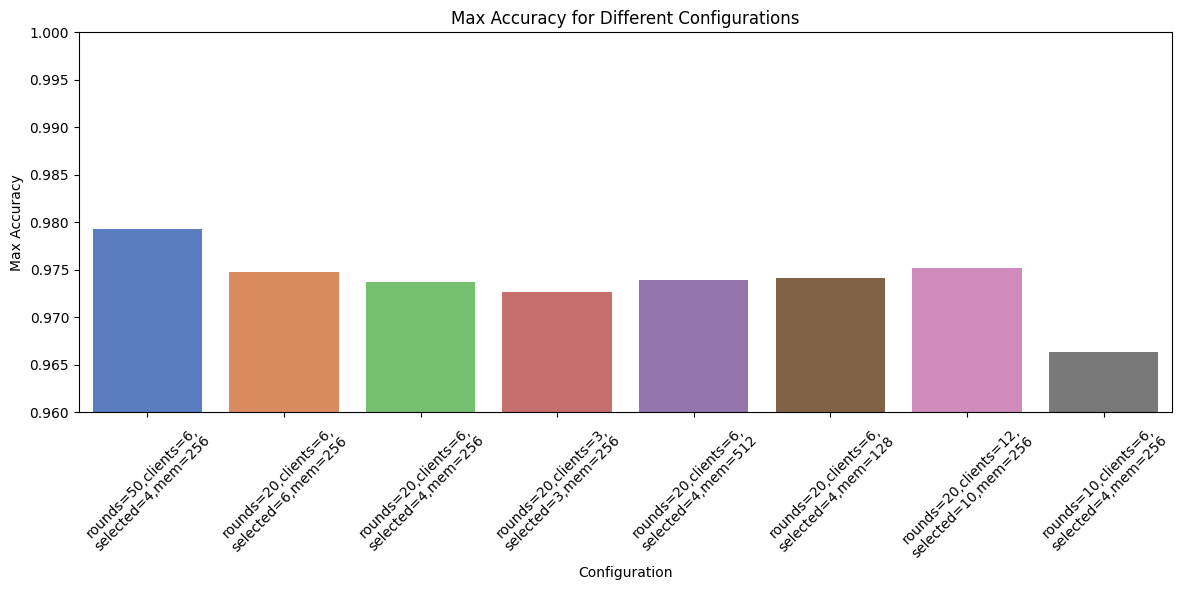

In [47]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='max_accuracy', data=df, palette='muted')
plt.title('Max Accuracy for Different Configurations')
plt.ylabel('Max Accuracy')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.ylim(0.96, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_accuracy',dpi=300)

/tmp/ipykernel_1078817/1976947532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='config', y='training_time', data=df, palette='muted')


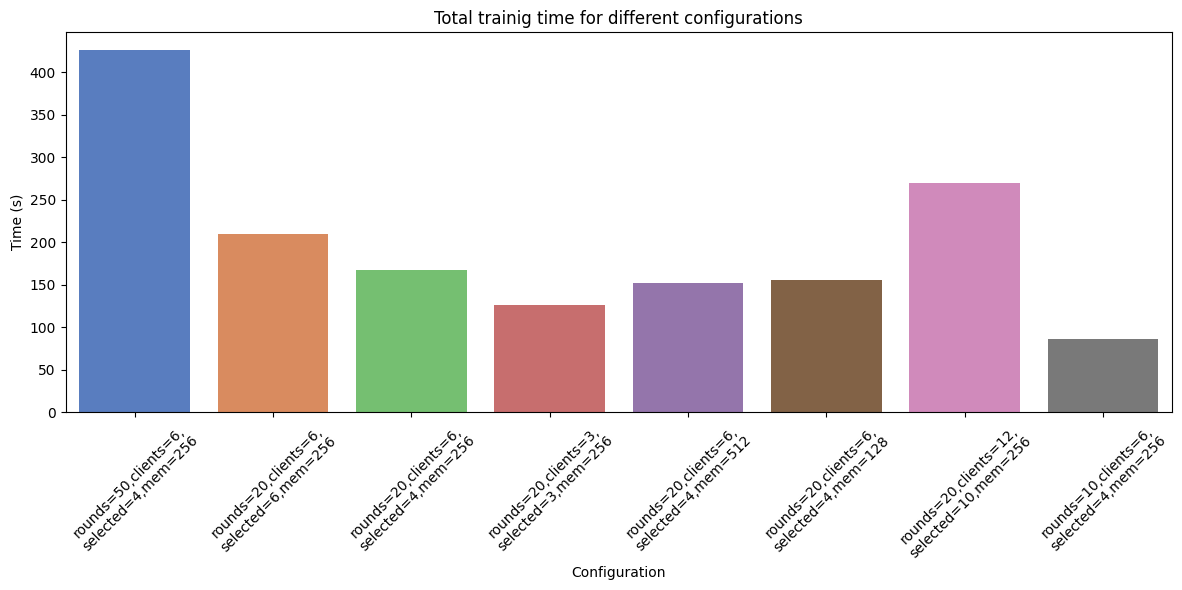

In [48]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='training_time', data=df, palette='muted')
plt.title('Total trainig time for different configurations')
plt.ylabel('Time (s)')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
#.ylim(0.96, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_training_time',dpi=300)

/tmp/ipykernel_1078817/345108323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='config', y='avg_train_round_duration', data=df, palette='muted')


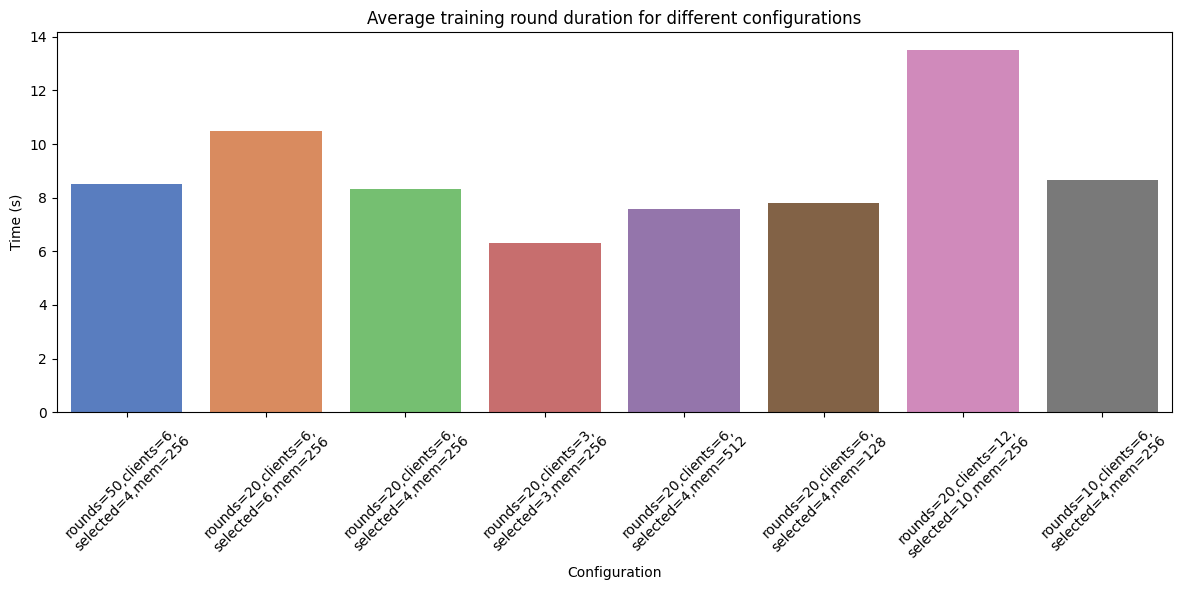

In [49]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='avg_train_round_duration', data=df, palette='muted')
plt.title('Average training round duration for different configurations')
plt.ylabel('Time (s)')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
#.ylim(0.96, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_avg_train_round_duration',dpi=300)

# Vanilla vs Openwhisk

In [116]:
df = pd.read_csv('final.csv')
df_vanilla = pd.read_csv('final_vanilla.csv')
df_vanilla

,Unnamed: 0,best_test_accuracy,total_training_time,avg_round_duration,best_train_accuracy,avg_local_train_time,rounds,clients,selected
0,0,0.548600,44.359216,2.217961,0.559583,1.964333,20,3,3
1,1,0.861875,43.716367,4.371637,0.937500,3.976667,10,6,4
2,2,0.510850,92.518010,4.625901,0.543264,4.233250,20,6,6
3,3,0.918350,95.465253,4.773263,0.985625,4.007967,20,6,4
4,4,0.930950,222.523362,4.450467,0.995764,4.096817,50,6,4
5,5,0.919275,195.540980,9.777049,0.977535,9.092417,20,12,10


In [117]:
df

,Unnamed: 0,rounds,clients,selected,max_accuracy,training_time,avg_train_round_duration,max_train_round_duration,avg_activation_duration,max_activation_duration,memory
0,0,50,6,4,0.979275,425.890812,8.503620,13.596435,4.914271,7.550228,256
1,1,20,6,6,0.974750,209.997709,10.486568,13.403386,5.121687,7.608816,256
2,2,20,6,4,0.973725,166.905564,8.333683,11.598840,4.387699,7.502552,256
3,3,20,3,3,0.972700,126.255989,6.296716,9.585515,3.199214,6.603033,256
4,4,20,6,4,0.973975,152.164156,7.590428,10.420126,3.702017,6.292055,512
5,5,20,6,4,0.974125,156.218395,7.793419,9.547950,3.696601,7.345283,128
6,6,20,12,10,0.975200,270.058720,13.492172,14.627133,3.663359,7.014763,256
7,7,10,6,4,0.966375,86.721383,8.648465,10.347809,5.023798,7.256526,256


In [118]:
df.rename(columns={
    "max_accuracy": "best_test_accuracy",
    "training_time": "total_training_time",
    "avg_train_round_duration": "avg_round_duration"
}, inplace=True)

In [119]:
df.drop(columns=['Unnamed: 0', 'max_train_round_duration','avg_activation_duration', 'max_activation_duration'], inplace=True)

In [120]:
df['impl'] = 'OW'
df_vanilla['impl'] = 'vanilla'

In [121]:
df_vanilla['memory'] = None

df_vanilla.drop(columns=['Unnamed: 0', 'best_train_accuracy', 'avg_local_train_time'],inplace=True)

In [122]:
df_all = pd.concat([df, df_vanilla])
df_all.reset_index()

,index,rounds,clients,selected,best_test_accuracy,total_training_time,avg_round_duration,memory,impl
0,0,50,6,4,0.979275,425.890812,8.503620,256,OW
1,1,20,6,6,0.974750,209.997709,10.486568,256,OW
2,2,20,6,4,0.973725,166.905564,8.333683,256,OW
3,3,20,3,3,0.972700,126.255989,6.296716,256,OW
4,4,20,6,4,0.973975,152.164156,7.590428,512,OW
5,5,20,6,4,0.974125,156.218395,7.793419,128,OW
6,6,20,12,10,0.975200,270.058720,13.492172,256,OW
7,7,10,6,4,0.966375,86.721383,8.648465,256,OW
8,0,20,3,3,0.548600,44.359216,2.217961,None,vanilla
9,1,10,6,4,0.861875,43.716367,4.371637,None,vanilla


,rounds,clients,selected,best_test_accuracy,total_training_time,avg_round_duration,memory,impl
0,50,6,4,0.979275,425.890812,8.503620,256,OW
1,20,6,6,0.974750,209.997709,10.486568,256,OW
2,20,6,4,0.973725,166.905564,8.333683,256,OW
3,20,3,3,0.972700,126.255989,6.296716,256,OW
4,20,6,4,0.973975,152.164156,7.590428,512,OW
5,20,6,4,0.974125,156.218395,7.793419,128,OW
6,20,12,10,0.975200,270.058720,13.492172,256,OW
7,10,6,4,0.966375,86.721383,8.648465,256,OW
0,20,3,3,0.548600,44.359216,2.217961,None,vanilla
1,10,6,4,0.861875,43.716367,4.371637,None,vanilla


In [145]:
df_all.sort_values(by=['rounds', 'clients', 'selected'], ascending=False, inplace=True)

In [138]:
df_all['config'] =  (df_all['impl'] + '_rounds=' + df_all['rounds'].astype(str) + ',clients=' + df_all['clients'].astype(str) + ',\nselected=' + df_all['selected'].astype(str) + ',mem=' + df_all['memory'].astype(str) ).values

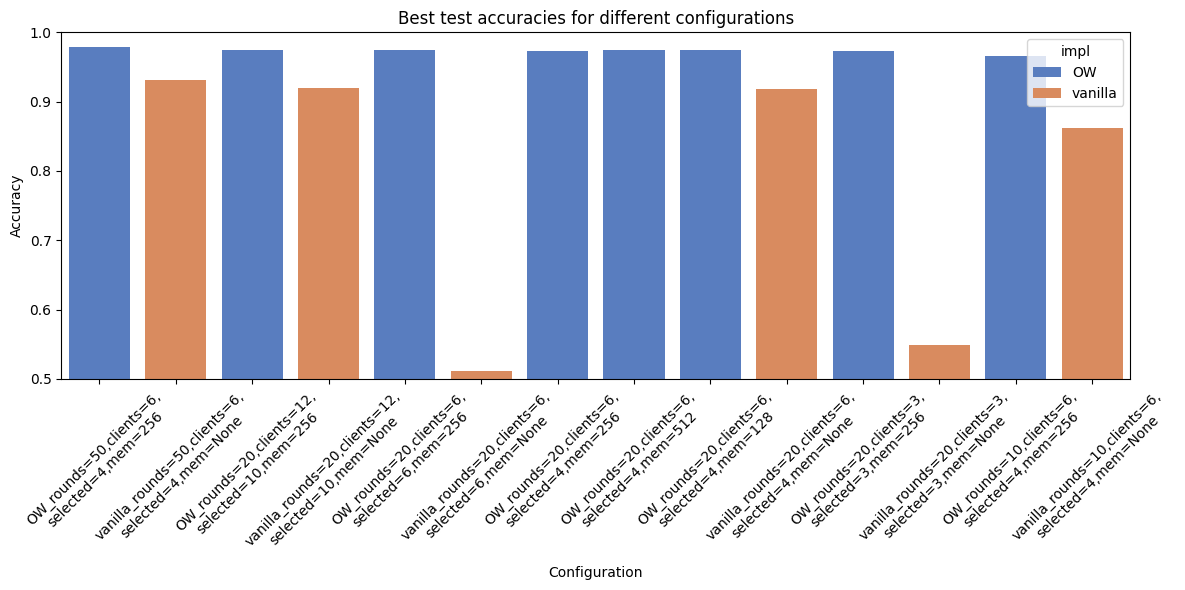

In [150]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='best_test_accuracy', hue='impl', data=df_all, palette='muted')
plt.title('Best test accuracies for different configurations')
plt.ylabel('Accuracy')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.ylim(0.5, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_avg_train_round_duration',dpi=300)

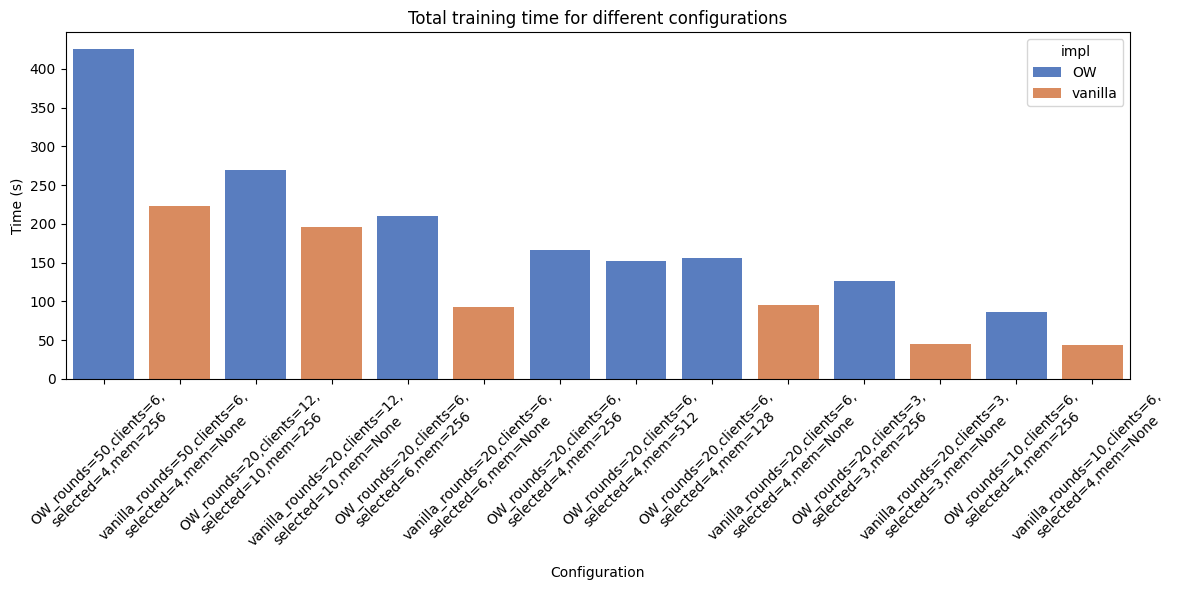

In [151]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='total_training_time', hue='impl', data=df_all, palette='muted')
plt.title('Total training time for different configurations')
plt.ylabel('Time (s)')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
#plt.ylim(0.5, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_avg_train_round_duration',dpi=300)

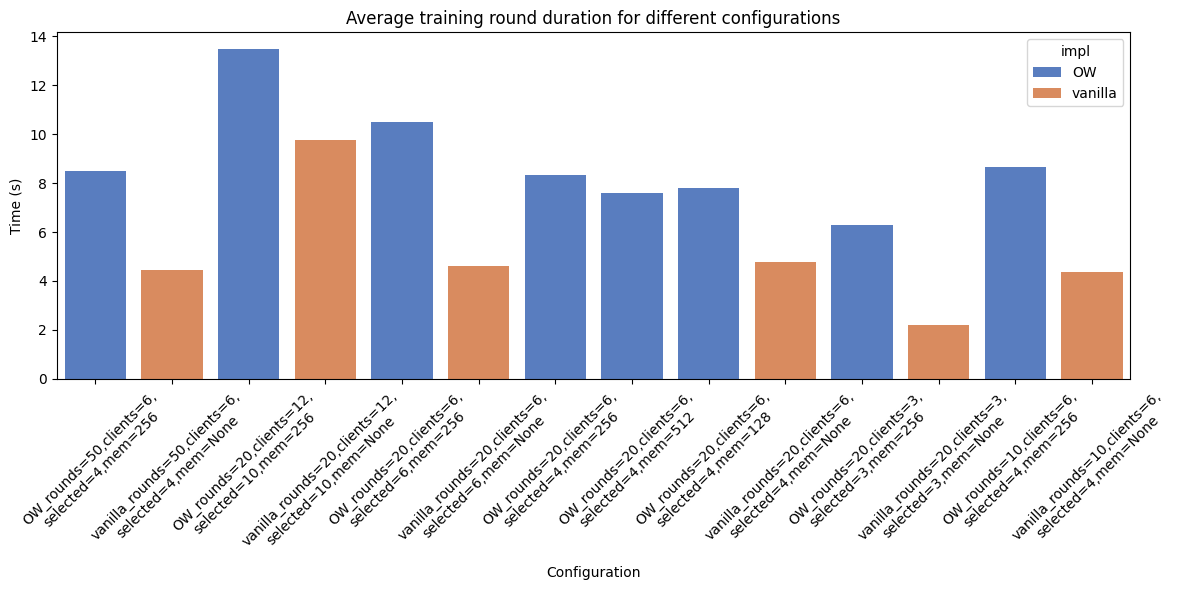

In [149]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='config', y='avg_round_duration', hue='impl', data=df_all, palette='muted')
plt.title('Average training round duration for different configurations')
plt.ylabel('Time (s)')
plt.xlabel('Configuration')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
#plt.ylim(0.5, 1)
plt.tight_layout()
plt.savefig(f'./plots/final_avg_train_round_duration',dpi=300)